In [1]:
import pandas as pd
import numpy as np

In [2]:
import h5py as h5
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding, Dropout, Activation, Reshape
#from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [3]:
dataset = pd.read_csv('sample_data/data_CKD_bigdata_refined.csv')


In [4]:
dataset.head()

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1.0,8.0,43.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1.0,25.951557,86.886038,2
1,1.0,7.0,11.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358,100.644197,1
2,1.0,9.0,41.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0,27.548209,95.928640,1
3,1.0,11.0,48.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1.0,26.122449,73.203730,2
4,1.0,11.0,30.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1.0,22.038567,105.714492,1


In [5]:
dataset.shape

(1000000, 29)

In [11]:
 Data=dataset[dataset['CREATININE ']<=2.5]
 Data
 

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1.0,8.0,43.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1.0,25.951557,86.886038,2
1,1.0,7.0,11.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358,100.644197,1
2,1.0,9.0,41.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0,27.548209,95.928640,1
3,1.0,11.0,48.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1.0,26.122449,73.203730,2
4,1.0,11.0,30.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1.0,22.038567,105.714492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.0,10.0,48.0,175.0,80.0,92.1,1.5,1.5,1.0,1.0,114.0,80.0,88.0,198.0,132.0,46.0,125.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0.0,0.0,26.122449,83.237802,2
999996,1.0,8.0,41.0,170.0,75.0,86.0,1.0,1.5,1.0,1.0,119.0,83.0,83.0,133.0,45.0,40.0,84.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0,0.0,25.951557,77.836416,2
999997,2.0,9.0,26.0,155.0,50.0,68.0,1.0,0.7,1.0,1.0,110.0,70.0,90.0,205.0,157.0,96.0,77.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1.0,0.0,20.811655,81.542158,2
999998,1.0,6.0,29.0,175.0,60.0,72.0,1.5,1.0,1.0,1.0,119.0,74.0,69.0,122.0,53.0,38.0,73.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0.0,0.0,19.591837,118.695643,1


In [18]:
creatine = np.arange(0.1,2.6,0.1)
cr=[]
original=[]
for c in creatine:
  cr.append(round(c,1))
  l=len(dataset[dataset['CREATININE '] == round(c,1)])
  original.append(l)
  print('c = ',c), print('l = ',l)
  

c =  0.1
l =  429
c =  0.2
l =  103
c =  0.30000000000000004
l =  609
c =  0.4
l =  6135
c =  0.5
l =  39372
c =  0.6
l =  110302
c =  0.7000000000000001
l =  165784
c =  0.8
l =  196451
c =  0.9
l =  182032
c =  1.0
l =  141798
c =  1.1
l =  86990
c =  1.2000000000000002
l =  41050
c =  1.3000000000000003
l =  15300
c =  1.4000000000000001
l =  5766
c =  1.5000000000000002
l =  2510
c =  1.6
l =  1298
c =  1.7000000000000002
l =  771
c =  1.8000000000000003
l =  568
c =  1.9000000000000001
l =  343
c =  2.0
l =  263
c =  2.1
l =  165
c =  2.2
l =  149
c =  2.3000000000000003
l =  111
c =  2.4000000000000004
l =  109
c =  2.5000000000000004
l =  80


In [20]:
original_data=pd.DataFrame({'Creatine':cr, 'Original': original})
original_data

,Creatine,Original
0,0.1,429
1,0.2,103
2,0.3,609
3,0.4,6135
4,0.5,39372
5,0.6,110302
6,0.7,165784
7,0.8,196451
8,0.9,182032
9,1.0,141798


In [7]:
X=Data.iloc[:,:-1]

In [8]:
y=Data.iloc[:,-1]

In [9]:
dataset.isnull().sum()

sex                      0
age                      0
sido                     0
height                   0
weight                   0
waist                    0
vision_left              0
vision_right             0
listen_left              0
listen_right             0
BP_HIGH                  0
BP_LWST                  0
BLDS                     0
TOT_CHOLE                0
TRIGLYCERIDE             0
HDL_CHOLE                0
LDL_CHOLE                0
HMG                      0
OLIG_PROTE_CD            0
CREATININE               0
SGOT_AST                 0
SGPT_ALT                 0
GAMMA_GTP                0
SMK_STAT_TYPE_RSPS_CD    0
DRINK_OR_NOT             0
MOUTH_CHECK              0
BMI                      0
GFR                      0
stage                    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
X_train.shape

(898677, 28)

In [ ]:
y_test.shape

(99854,)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
#Data_train

In [ ]:
#Data_test

array([[1.        , 0.61538462, 0.38461538, ..., 0.31317108, 0.06499379,
        0.        ],
       [1.        , 0.30769231, 0.        , ..., 0.50107373, 0.07085938,
        0.        ],
       [0.        , 0.30769231, 0.        , ..., 0.45327847, 0.05757628,
        0.        ],
       ...,
       [0.        , 0.30769231, 0.46153846, ..., 0.36123325, 0.05757628,
        0.        ],
       [0.        , 0.38461538, 0.51282051, ..., 0.39800622, 0.0279839 ,
        0.5       ],
       [0.        , 0.30769231, 0.76923077, ..., 0.35315728, 0.06804611,
        0.        ]])

In [ ]:
#df = pd.DataFrame(data=Data_train)

In [ ]:
#df

In [ ]:
# df.to_csv('TrainCKD.csv', index=False)

In [ ]:
# from google.colab import files
# files.download('TrainCKD.csv')

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# DM_train = xgb.DMatrix(data = X_train, 
#                        label = y_train)
					   
					   
# DM_test =  xgb.DMatrix(data = X_test,
#                        label = y_test)

In [ ]:
# gbm_param_grid = {
#      'colsample_bytree': np.linspace(0.5, 0.9, 5),
#      'n_estimators':[100, 200],
#      'max_depth': [10, 15, 20, 25]
}

In [ ]:
#gbm = xgb.XGBRegressor()

In [ ]:
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

In [ ]:
#grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 2, verbose = 1)

In [ ]:
xgb_reg.fit(X_train, y_train)


[18:44:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=2, nthread=None, objective='reg:linear',
             objectvie='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_reg.predict(X_test) # Predictions
y_true = y_test # True values


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
R_squared = r2_score(y_true, y_pred)

In [ ]:
print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))

# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xgb_reg, X_train, y_train, X_test, y_test))

# Making the Residuals Plot
print("\nResiduals Plot")
print(residuals_plot(xgb_reg, X_train, y_train, X_test, y_test))


RMSE:  0.02

R-Squared:  1.0

Prediction Error Plot
[18:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


AttributeError: ignored

In [ ]:
# grid_mse.fit(X_train, y_train)

# print("Best parameters found: ",grid_mse.best_params_)
# print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[18:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [ ]:
print(grid_mse.cv_results_)

In [ ]:
pred = grid_mse.predict(X_test)

print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(y_test, pred)), 2)))

In [ ]:
test = pd.DataFrame({"prediction": pred, "observed": y_test.flatten()})

lowess = sm.nonparametric.lowess

z = lowess(pred.flatten(), y_test.flatten())


test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'darkred')

plt.title("Extreme Gradient Boosting: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")

plt.xlabel("Predicted Power Output", fontsize = 18) 

plt.ylabel("Observed Power Output", fontsize = 18)

plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)

plt.show()

In [ ]:
#xgb= XGBRegressor(n_estimators=1000)

In [ ]:
model = XGBRegressor()

In [ ]:
#define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [ ]:
# xg = xgb.XGBRegressor()
# best_xgb = GridSearchCV(
#     xg, param_grid=params, cv=10, verbose=0, n_jobs=-1)

# scores = cross_val_score(best_xgb, X, y, scoring='r2', cv=kfold) 

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# from sklearn.model_selection import train_test_split    
# from sklearn.preprocessing import MinMaxScaler
# from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# import keras.layers
# from tensorflow.keras.utils import to_categorical
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter
# # Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values
# # new_y = np.asarray(y)
# # (unique,counts) = np.unique(new_y,return_counts =True)
# # print(unique)
# # print(counts)
# # print(new_y.shape)
# oversample = RandomOverSampler(random_state=42)
# X_randomover, y_randomover = oversample.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_randomover, y_randomover, test_size=0.2, random_state = 2)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# y_train = to_categorical(y_train,dtype="uint8")
# # #print(y_train_new.shape)
# y_test = to_categorical(y_test,dtype ="uint8")
# print(y_test.shape)

# print(X_train.shape)
# print(X_test.shape)

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import keras.layers
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
#smote = SMOTE('minority')
# # Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values
# print(X.shape)
# print(y.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# X_train,y_train = smote.fit_resample(X_train,y_train)
# print(X_train.shape,y_train.shape)
# y_train = to_categorical(y_train,dtype="uint8")
# print(y_train.shape)
# y_test = to_categorical(y_test,dtype ="uint8")
# print(y_test.shape)

# print(X_train.shape)
# print(X_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# from sklearn.model_selection import train_test_split    
# from sklearn.preprocessing import MinMaxScaler
# from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# import keras.layers
# from tensorflow.keras.utils import to_categorical
# #from imblearn.over_sampling import RandomOverSampler
# from collections import Counter
# # Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values#from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter
# #oversample = RandomOverSampler(random_state=42)
# undersample = RandomUnderSampler(sampling_strategy='majority')
# #X_randomover, y_randomover = oversample.fit_resample(X, y)
# X_over,y_over = undersample.fit_resample(X, y)
# #X_over,y_over = undersample.fit_resample(X_over,y_over)
# #X_over,y_over = undersample.fit_resample(X_over,y_over)

In [ ]:
#Counter(y_over)

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from collections import Counter
#Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

X = scaler.fit_transform(X)

In [ ]:

strategy = {1:475386, 2:486184, 3:36377, 4:36377, 5:36377}
smote = SMOTE(sampling_strategy=strategy)
X_sm,y_sm =smote.fit_resample(X,y)
print(len(X_sm))

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state = 2)
# #print(y_train_new.shape)

print(X_train.shape,y_train.shape)
y_train = to_categorical(y_train,dtype="uint8")
print(y_train.shape)
y_test = to_categorical(y_test,dtype ="uint8")
print(y_test.shape)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1070701
(856560, 28) (856560,)
(856560, 6)
(214141, 6)


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)
print(X_test.shape)

(856560, 28, 1)
(214141, 28, 1)


In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import time
def evaluate_model_CNN(X_train, X_val, y_train, y_val):
  model = LSTM
  timesteps=125
  dims=4
  model=Sequential()
#   model.add(LSTM(24,
#   dropout=0.2,return_sequences=True,
#   activation='tanh', recurrent_activation='tanh',recurrent_dropout=0.2,input_shape=(1,X_train.shape[2])))
#   model.add(LSTM(12, 
#   activation='tanh', recurrent_activation='tanh',
#   dropout=0.2,recurrent_dropout=0.2))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(keras.layers.Dense (64,activation='relu')) #input layer
  model.add(Dropout(0.2))
  model.add(keras.layers.Dense (64,activation='relu')) #input layer
  model.add(Dropout(0.2))
  model.add(keras.layers.Dense (32,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (16,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (6,activation='softmax')) #output
  epochs = 400
  batch_size = 64
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs = 100,batch_size=128,verbose=1)
  # val_acc = model.evaluate(X_val, y_val, verbose = 1)
  # predictions = model.predict_classes(X_test)
  # print(classification_report(y_test,predictions))
  # print(confusion_matrix(y_test,predictions))
  return history, model

#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())

Epoch 1/100
6692/6692 [==============================] - 81s 12ms/step - loss: 0.4770 - accuracy: 0.7985 - val_loss: 0.3205 - val_accuracy: 0.8579
Epoch 2/100
6692/6692 [==============================] - 84s 12ms/step - loss: 0.1819 - accuracy: 0.9440 - val_loss: 0.3275 - val_accuracy: 0.8716
Epoch 3/100
6692/6692 [==============================] - 84s 13ms/step - loss: 0.1316 - accuracy: 0.9644 - val_loss: 0.0498 - val_accuracy: 0.9882
Epoch 4/100
6692/6692 [==============================] - 84s 13ms/step - loss: 0.1240 - accuracy: 0.9692 - val_loss: 0.0375 - val_accuracy: 0.9905
Epoch 5/100
6692/6692 [==============================] - 88s 13ms/step - loss: 0.1269 - accuracy: 0.9692 - val_loss: 0.0469 - val_accuracy: 0.9932
Epoch 6/100
6692/6692 [==============================] - 93s 14ms/step - loss: 0.1474 - accuracy: 0.9657 - val_loss: 0.0663 - val_accuracy: 0.9883
Epoch 7/100
6692/6692 [==============================] - 90s 13ms/step - loss: 0.1629 - accuracy: 0.9614 - val_loss: 0

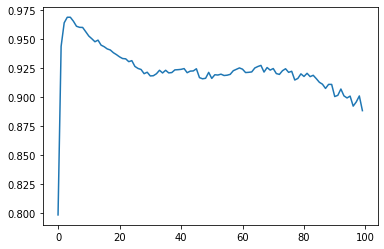

In [ ]:
n_folds = 1
cv_scores, model_history = list(), list()
#for _ in range(n_folds):  
  # split data
  # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
  # evaluate model
  # print(X_train.shape)
  # print(y_train.shape)
  # print(X_test.shape)
  # print(y_test.shape)
start_time = time.time()
model = tf.keras.Sequential()
history, model= evaluate_model_CNN(X_train, X_test, y_train, y_test)
# list all data in history
print(history.history.keys())
print("--- %s seconds ---" % (time.time() - start_time))
# summarize history for accuracy
plt.plot(history.history['accuracy'])

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[0.0000000e+00 0.0000000e+00 2.6632515e-35 3.8044462e-24 9.0545240e-05
  9.9990940e-01]
 [0.0000000e+00 0.0000000e+00 1.1822277e-18 1.4890338e-13 9.7957095e-03
  9.9020433e-01]
 [1.7290620e-11 1.0336689e-02 9.5782089e-01 3.0621840e-02 2.9753812e-04
  9.2302181e-04]
 ...
 [1.7750370e-17 8.4124023e-01 1.5848458e-01 3.9763509e-06 1.3202275e-18
  2.7119488e-04]
 [0.0000000e+00 9.9966657e-01 3.3339157e-04 0.0000000e+00 0.0000000e+00
  1.2278416e-26]
 [2.9322868e-12 5.3846353e-01 4.5701593e-01 3.2143036e-03 1.8494463e-06
  1.3042963e-03]]
[5 5 2 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))
# pl.plot()
# plt.show()

[[89357  5579     0     0     1]
 [ 1254 95903     1    30     0]
 [    0  6044   185  1043     0]
 [    0    44     2  7243   107]
 [   42    77     0   411  6818]]


In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))


Accuracy: 0.93



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']))




In [ ]:
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']

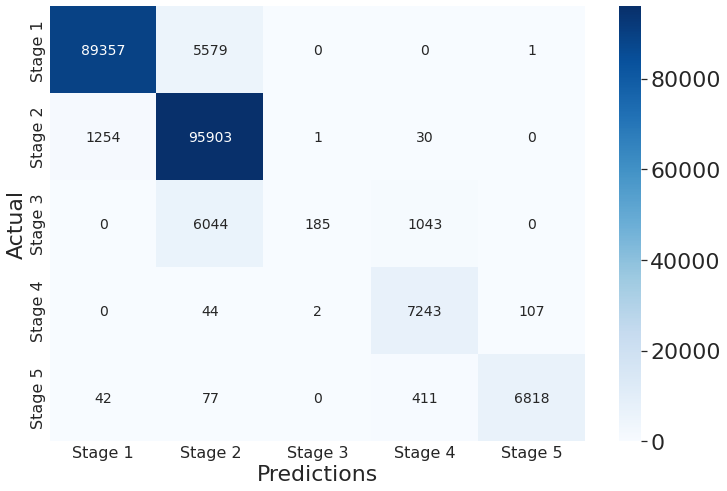

In [ ]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (12, 8))
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 2)
sn.heatmap(df_cm,annot=True,annot_kws={"size":14},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=22)
plt.ylabel('Actual',fontsize=22)
plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.savefig('CNN-ANN_ConfusionMatrix.png', dpi=300)
# from mlxtend.plotting import plot_confusion_matrix
# fig,ax = plot_confusion_matrix(conf_mat = mat,fontsize=20)
# plt.xlabel('Predictions',fontsize=18)
# plt.ylabel('Actual',fontsize=18)
# plt.show()

In [ ]:
from google.colab import files
files.download('CNN-ANN_ConfusionMatrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

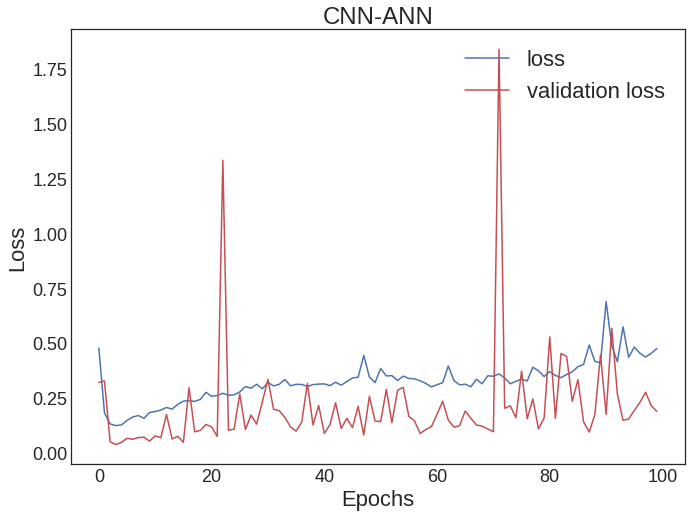

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.style.use('seaborn-white')
#fig = plt.subplots(1,1, figsize = (12, 8))
fig.set_size_inches(11,8, forward=True)
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('CNN-ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.draw()
plt.savefig('CNN-ANN_100sec.png', dpi=300)

In [ ]:
from google.colab import files
files.download('CNN-ANN_100sec.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC score: 0.8741623886432238


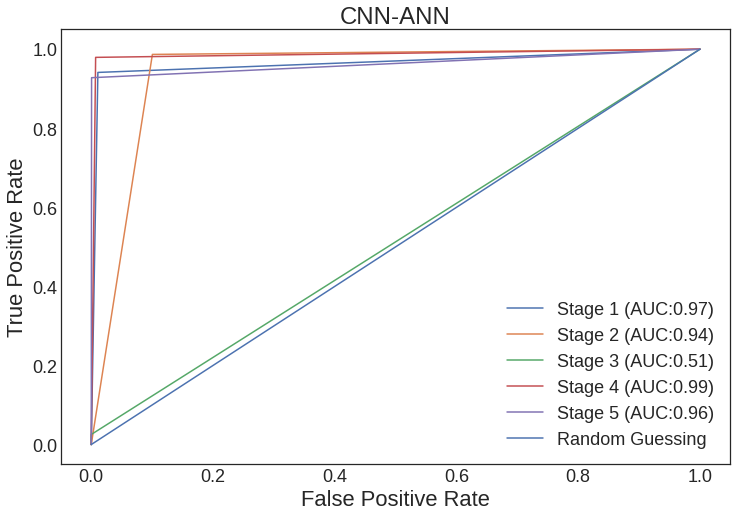

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('CNN-ANN',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('CNN-ANN_AUC.png', dpi=300)
plt.show()


In [ ]:
from google.colab import files
files.download('CNN-ANN_AUC.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import matplotlib.pyplot as plt 
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# #plt.style.use('seaborn-white')

# target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# # set plot figure size
# fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# # function for scoring roc auc score for multi-class
# def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_classes_1)
#     y_test = lb.transform(y_classes_1)
#     y_pred = lb.transform(y_classes)

#     for (idx, c_label) in enumerate(target):
#         fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
#         c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
#     c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
#     return roc_auc_score(y_test, y_pred, average=average)
# print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
# c_ax.legend(fontsize=18,)
# #c_ax.legend()
# c_ax.set_xlabel('False Positive Rate',)
# c_ax.set_ylabel('True Positive rate')
# plt.show()



In [ ]:
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D

# def evaluate_model_LSTM(X_train, X_val, y_train, y_val):
#   model = LSTM
#   timesteps=125
#   dims=4
#   model=Sequential()
#   model.add(LSTM(24,
#   dropout=0.2,return_sequences=True,
#   activation='tanh', recurrent_activation='tanh',recurrent_dropout=0.2,input_shape=(X_train.shape[1],1)))
#   model.add(LSTM(12, 
#   activation='tanh', recurrent_activation='tanh',
#   dropout=0.2,recurrent_dropout=0.2))
#   model.add(keras.layers.Dense (64,activation='relu')) #input layer
#   model.add(Dropout(0.2))
#   model.add(keras.layers.Dense (32,activation='relu')) #hidden
#   model.add(Dropout(0.3))
#   model.add(keras.layers.Dense (16,activation='relu')) #hidden
#   model.add(Dropout(0.3))
#   model.add(keras.layers.Dense (6,activation='softmax')) #output


#   epochs = 400
#   batch_size = 64
#   model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
#   model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=100, batch_size=128, verbose=1)
#   val_acc = model.evaluate(X_val, y_val, verbose = 1)
#   return model, val_acc

# #model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# # model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(MaxPooling1D(pool_size=2))
# # model.add(Flatten())

In [ ]:
# n_folds = 1
# cv_scores, model_history = list(), list()
# for _ in range(n_folds):  
#   # split data
#   # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
#   # evaluate model
#   print(X_train.shape)
#   print(y_train.shape)
#   print(X_test.shape)
#   print(y_test.shape)
#   model = tf.keras.Sequential()
#   model, test_acc = evaluate_model_LSTM(X_train, X_test, y_train, y_test)
# # list all data in history
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])